# Final Phase Project
## Douglas McArthur

## Code Setup
As well as importing the required code libraries, it was necessary to add a temporary environment variable to prevent a warning message relating to KMeans having a memory leak issue on Windows.

In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

from simulation import Simulation
from settings import Settings

## Part 1
The following sections demonstrate running the simulation at time points 0, 1, 2, 3, 5, and 10. Default settings are used for each run. Note that at time 0 the network is in an initialised state with respect to opinions, and all activities are plotted. Subsequent executions plot only activities that are active within a pariticular activity period.

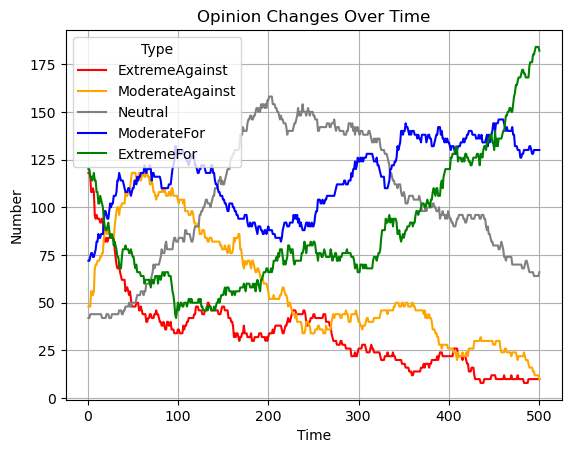

In [41]:
settings = Settings()
s = Simulation(settings)
s.run()
s.chart()

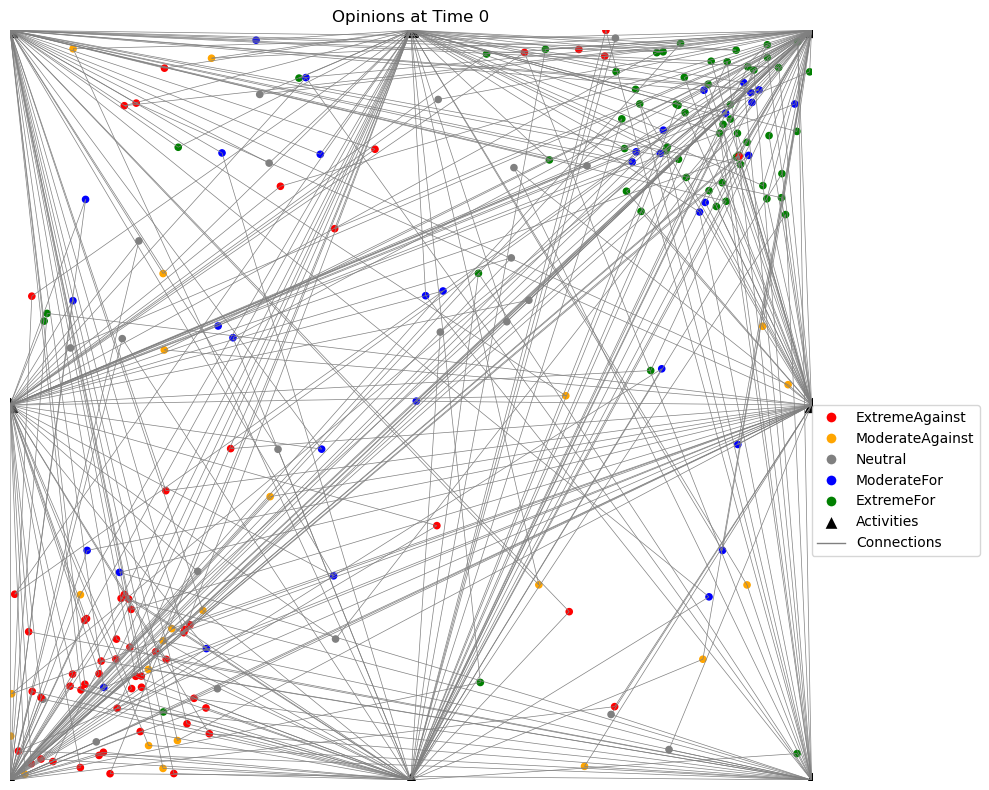

In [44]:
s.plot_network(0)

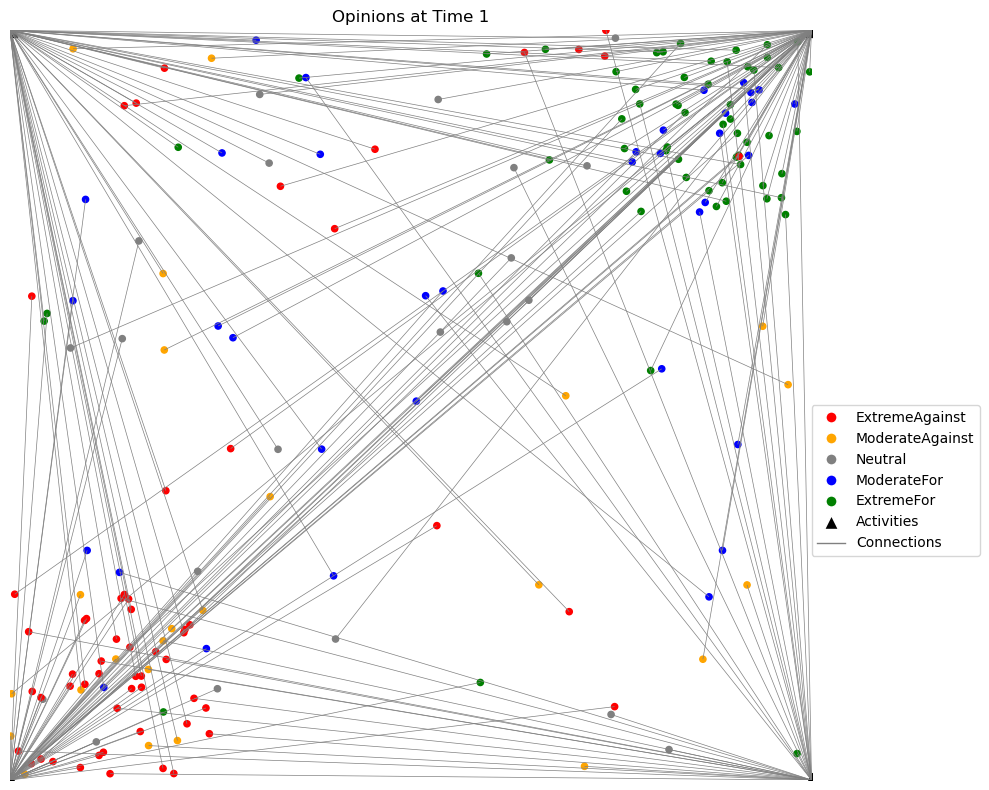

In [47]:
s.plot_network(1)

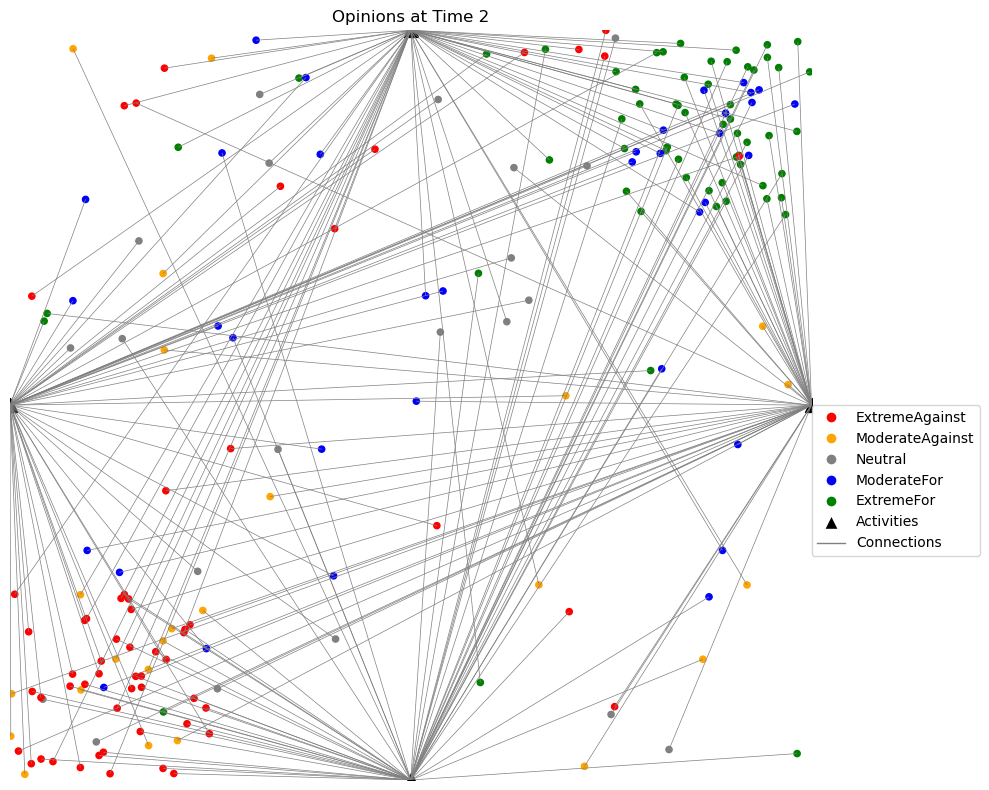

In [49]:
s.plot_network(2)

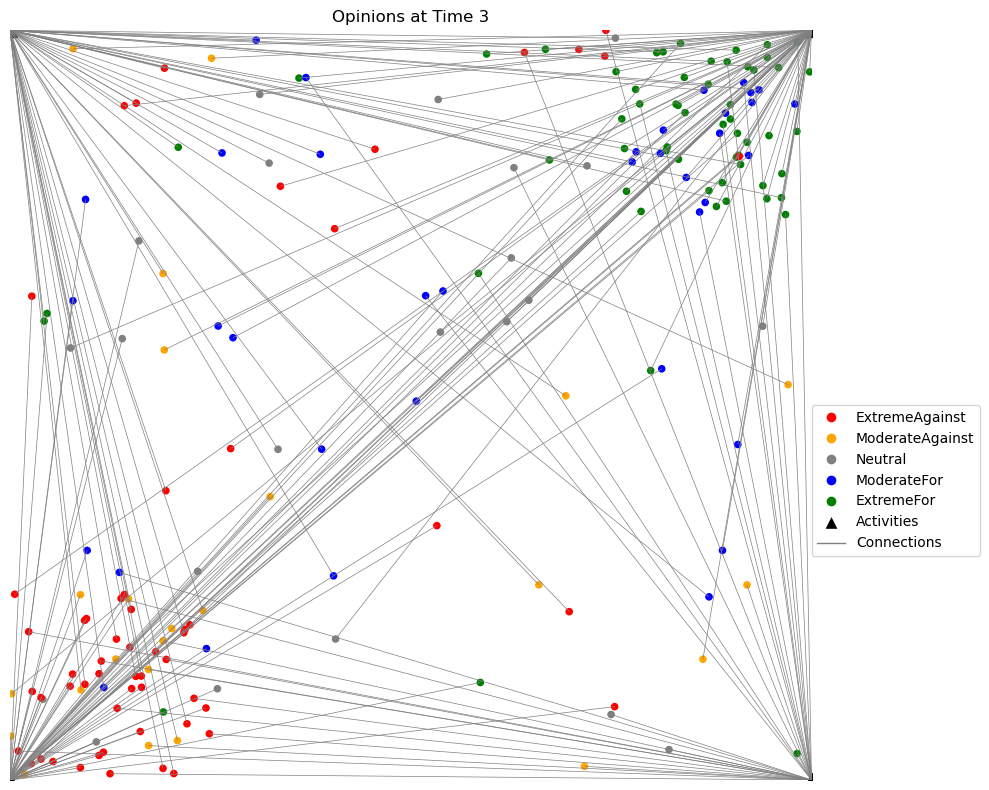

In [51]:
s.plot_network(3)

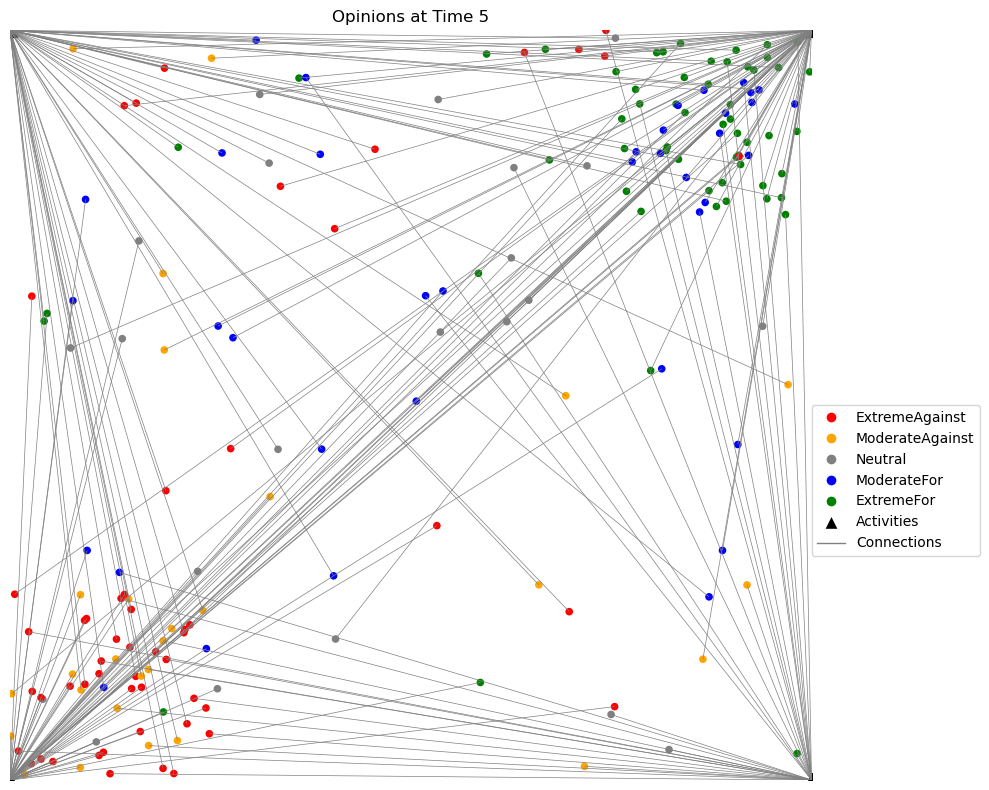

In [53]:
s.plot_network(5)

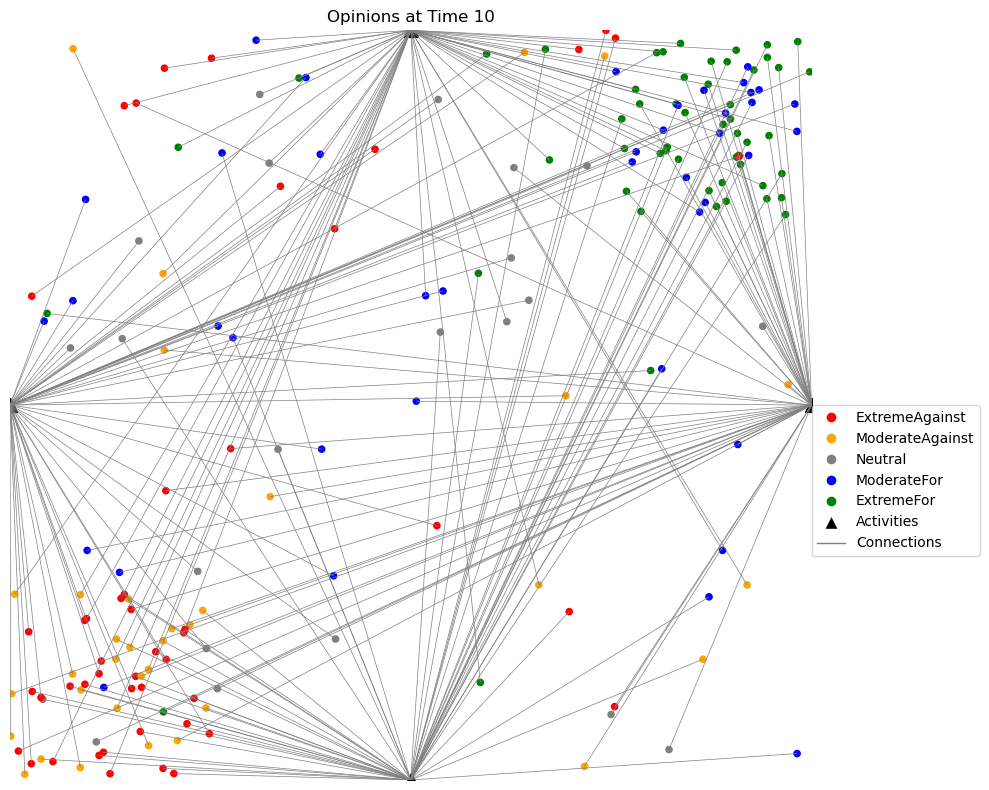

In [55]:
s.plot_network(10)

## Part 2
The section executes the simulation first of all with a beta update setting of 0, resulting in the opinions of individuals only changing when they become totally convinced. Next, the simulation is run with the default settings. The final execution changes the lambda distance setting from 1 to 100.

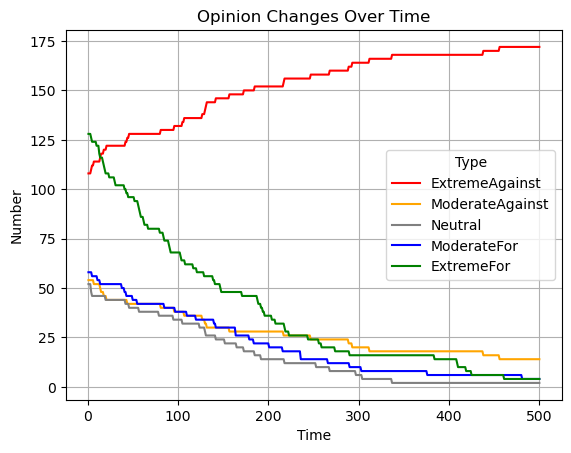

In [62]:
settings = Settings(beta_update=0)
s = Simulation(settings)
s.run()
s.chart()

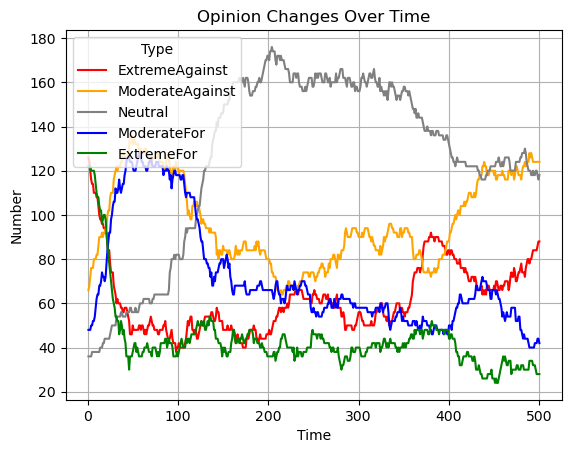

In [64]:
settings = Settings()
s = Simulation(settings)
s.run()
s.chart()

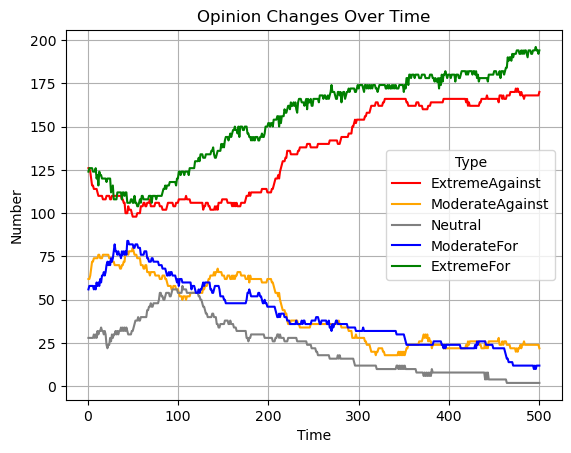

In [66]:
settings = Settings(lambda_dist=100)
s = Simulation(settings)
s.run()
s.chart()

## Part 3

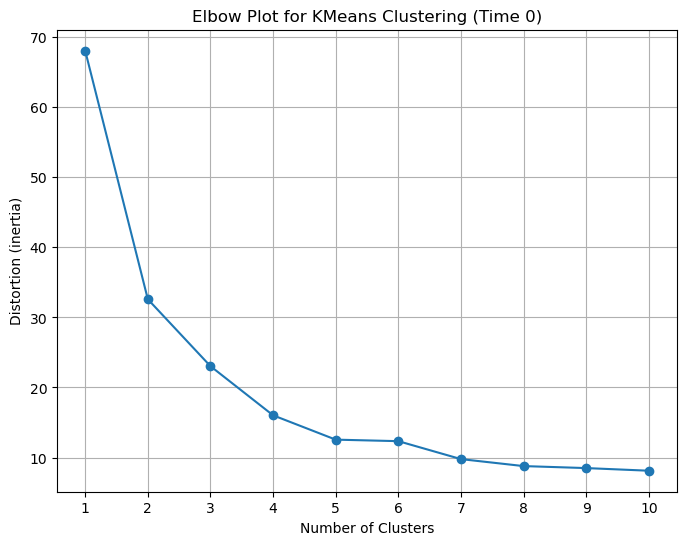

In [68]:
settings = Settings()
s = Simulation(settings)
s.run()
s.get_elbow_plot(0)

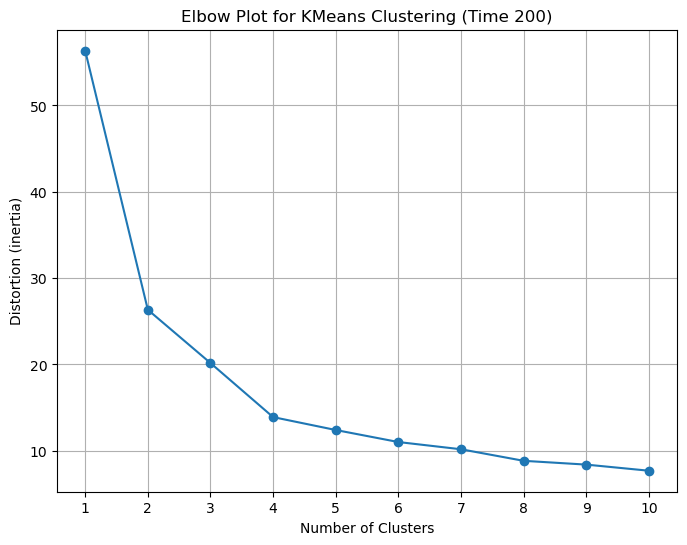

In [70]:
s.get_elbow_plot(200)

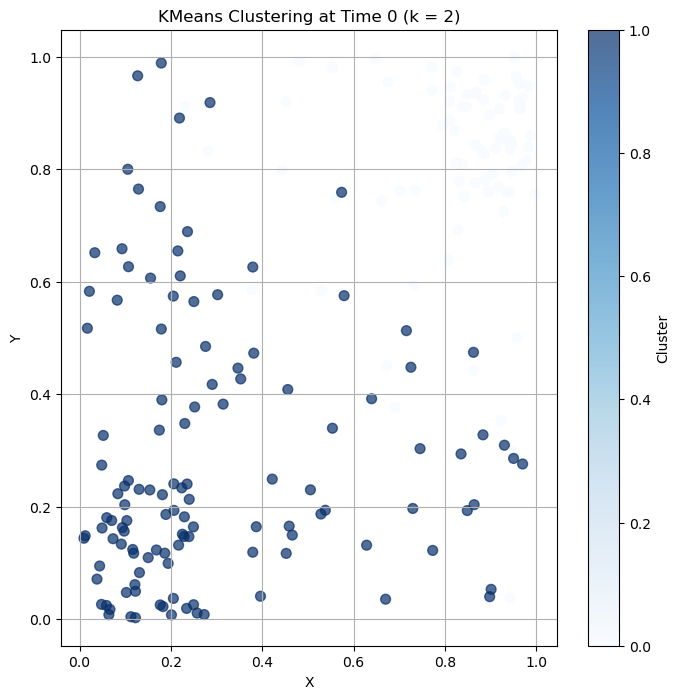

In [80]:
s.kmeans_clustering(0, 2)

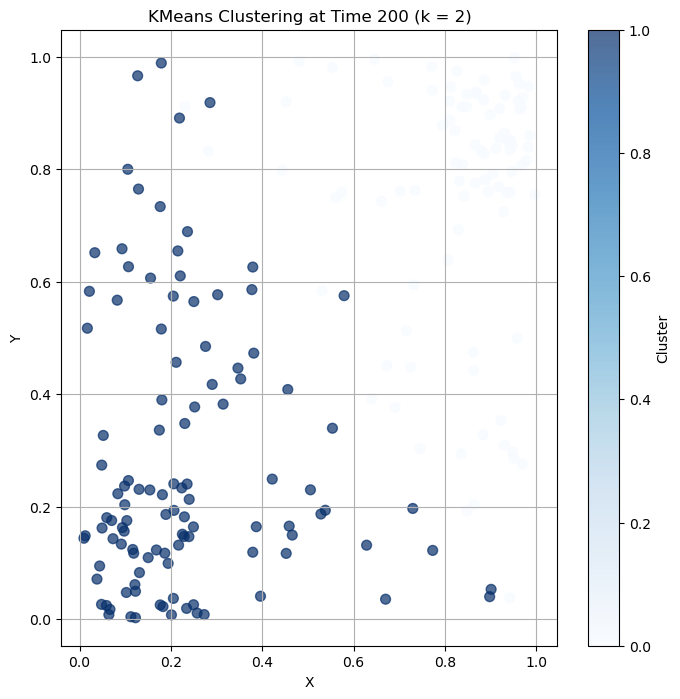

In [82]:
s.kmeans_clustering(200, 2)

## Ensemble Statistics

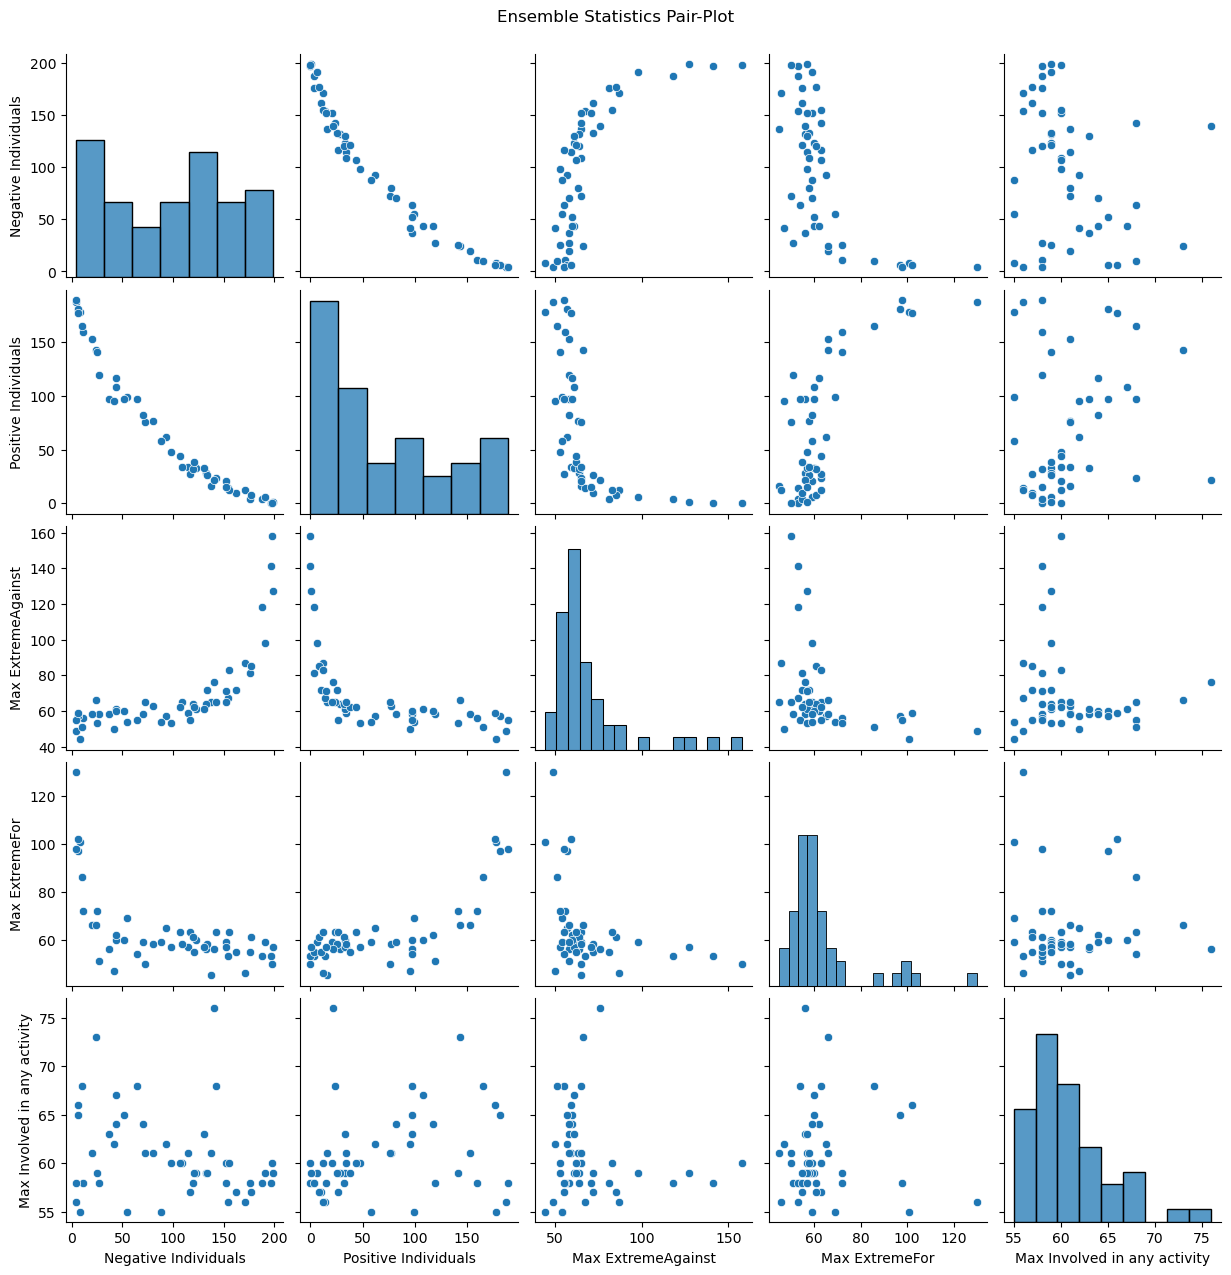

Negative Individuals  Positive Individuals  Max ExtremeAgainst  \
0                    137                    16                  65   
1                    115                    34                  59   
2                    123                    33                  61   
3                     93                    62                  57   
4                    188                     4                 118   
5                     37                    97                  58   
6                    132                    28                  64   
7                     42                    95                  50   
8                      4                   187                  49   
9                     27                   119                  58   
10                   191                     6                  98   
11                    44                   108                  61   
12                    20                   153                  58   
13                    11                   159                  56   
14                    55                    99                  54   
15                   197                     0                 141   
16                   142                    24                  65   
17                    80                    77                  63   
18                   154                    14                  67   
19                   152                    21                  65   
20                    64                    97                  55   
21                   176                     4                  81   
22                    44                   117                  60   
23                   133                    26                  72   
24                    98                    48                  53   
25                   130                    33                  61   
26                    24                   143                  66   
27                     8                   178                  44   
28                   117                    27                  55   
29                   120                    32                  64   
30                   199                     1                 127   
31                    52                    97                  60   
32                   171                    12                  87   
33                   198                     0                 158   
34                   162                    10                  72   
35                    25                   141                  53   
36                   121                    38                  62   
37                   109                    34                  65   
38                    10                   165                  51   
39                     6                   181                  57   
40                   107                    44                  62   
41                     4                   189                  55   
42                    88                    58                  54   
43                   140                    22                  76   
44                     6                   177                  59   
45                   177                     8                  85   
46                   155                    12                  83   
47                   152                    15                  71   
48                    72                    76                  65   
49                    70                    82                  58   

    Max ExtremeFor  Max Involved in any activity  
0               45                            61  
1               57                            61  
2               60                            59  
3               65                            62  
4               53                            58  
5               56                            63  
6               56                            59  
7               47       

In [37]:
settings = Settings(n=200)
Simulation.ensemble_statistics(50, settings)

## Linear Regression Exploration

Simulation setup: default settings.

In [3]:
from itertools import combinations
import statsmodels.api as sm
import pandas as pd
import numpy as np

settings = Settings()
simulation = Simulation(settings)
simulation.run()
print(simulation.activity_summary(500))

category  ExtremeAgainst  ModerateAgainst  Neutral  ModerateFor  ExtremeFor
Activity                                                                   
200                   14               40        3            0           2
201                    5               22       11            4           1
202                    9               21       12            1           3
203                    0                0       12           27          13
204                   12               28        8            4           4
205                    1               26       14            9           5
206                    5                8       11           14           7
207                   10               21        5            5           3


In [ ]:
Function to find "best" model.

In [5]:
def find_best_model(simulation, predictors_pool):
    """
    Find the best model based on adjusted R² using exhaustive search over all predictor combinations.
    
    Args:
        simulation: Instance of the simulation class with `fit_regression_model` defined.
        predictors_pool (list): List of all potential predictors.
    
    Returns:
        Best model summary and the set of predictors used.
    """
    best_model = None
    best_adj_r2 = -np.inf
    best_predictors = None

    # Test all possible combinations of predictors
    for r in range(1, len(predictors_pool) + 1):  # Iterate over subset sizes
        for subset in combinations(predictors_pool, r):
            model = simulation.fit_regression_model(predictors=list(subset))
            adj_r2 = model.rsquared_adj  # Adjusted R²
            
            # Check if this model is "better"
            if adj_r2 > best_adj_r2:
                best_model = model
                best_adj_r2 = adj_r2
                best_predictors = subset

    return best_model, best_predictors

In [13]:
# Define the list of all potential predictors
predictors_pool = [
    "InitialOpinion",
    "DistanceToCentre",
    "NearestActivityDistance"
] 

# Find the best model
best_model, best_predictors = find_best_model(simulation, predictors_pool)

print(f"Best Adjusted R²: {best_model.rsquared_adj}")
print(f"Best Predictors: {best_predictors}")

# Compare to full model
full_model = simulation.fit_regression_model()
print(f"Full model Adjusted R²: {full_model.rsquared_adj}")

Best Adjusted R²: 0.18526295682051652
Best Predictors: ('InitialOpinion', 'DistanceToCentre')
Full model Adjusted R²: 0.5145874742029256


In [15]:
mse_0 = simulation.cross_validate_model() # Full model
mse_1 = simulation.cross_validate_model(["InitialOpinion"])
mse_2 = simulation.cross_validate_model(["InitialOpinion", "DistanceToCentre"])
mse_3 = simulation.cross_validate_model(["InitialOpinion", "DistanceToCentre", "NearestActivityDistance"])
print(f"0: {mse_0} 1: {mse_1} 2: {mse_2} 3: {mse_3}")

0: 0.028566024396574238 1: 0.044774428192184725 2: 0.04471523837504174 3: 0.045820083387975136
